In [1]:
import mysql.connector as sql
import pandas as pd
import datetime as dt
import numpy as np
from sorted_months_weekdays import *
from sort_dataframeby_monthorweek import *
import matplotlib.pyplot as plt
import math

In [2]:
db_connection = sql.connect(host='localhost', database='collection_visits', user='pandas', password='password')

pensActivity = pd.read_sql('SELECT * FROM PensActivity', con=db_connection)
pensActivity['created'] = pd.to_datetime(pensActivity['created'], unit='s')
pensActivity['lastmodified'] = pd.to_datetime(pensActivity['lastmodified'], unit='s')
pensActivity['created'].replace(0, np.nan, inplace=True)
pensActivity['lastmodified'].replace(0, np.nan, inplace=True)
pensActivity['notes'].replace(r'^\s*$', np.NaN, regex=True, inplace=True)
pensActivity['notes'] = pensActivity['notes'].astype('category')
pensActivity.sort_values(by='created', inplace=True)

In [3]:
pensActivity

,visit_id,pen_id,fingerprint,activity,notes,status_id,created,lastmodified,time_to_process,count_items
131729,1509709,5,25d0ca6227e881c0f38c088d9f424737ec2773e1,"{""collection"":[{""record_id"":1,""record_data"":""c...",NaN,1,2014-12-15 15:32:19,2014-12-15 15:32:19,0,2
628374,1509661,1509681,b4737a3d142bb06f6d70dd02bd64f6a956792e59,"{""pen_uid"":""91ff826f0b001e00"",""initial_time_st...",Insufficient permissions for object at index 1,0,2014-12-15 15:52:19,2014-12-15 15:52:19,0,7
473963,1509705,1509673,8810c7196f7f12237868251ff4b34ffe1e2a6d99,"{""pen_uid"":""90ff826f0a001d00"",""initial_time_st...",Insufficient permissions for object at index 3,0,2014-12-15 15:56:09,2014-12-15 15:56:09,0,5
771570,1509665,1509677,dd7a1ecaf59145b51fb13110598a99be48cc88ff,"{""pen_uid"":""91ff826f08001b00"",""initial_time_st...",Insufficient permissions for object at index 1,0,2014-12-15 15:56:30,2014-12-15 18:11:49,0,6
760275,1509687,1509683,da4055c2974155441bc26679ea37d9d57421a4fc,"{""pen_uid"":""91ff826f22001600"",""initial_time_st...",Insufficient permissions for object at index 2,0,2014-12-15 15:58:11,2014-12-15 18:10:29,0,6
...,...,...,...,...,...,...,...,...,...,...
494124,132777683,1524473,8de20189e64f86c4f892b98ca7d30077b00b3874,"{""ticket_id"":""tzctj"",""registers"":""None"",""colle...",NaN,1,2020-07-02 20:22:39,2020-07-02 20:22:39,161,1
676664,132794701,1524473,c24003e782909cd4a8385fd84970943237aa605b,"{""ticket_id"":""gz65"",""registers"":""None"",""collec...",NaN,1,2020-07-06 17:42:37,2020-07-06 17:42:37,159,1
283113,132806719,1524473,513e424fc16895f97ae6e70e9bb74f9a58c59229,"{""ticket_id"":""56bs6"",""registers"":""None"",""colle...",NaN,1,2020-07-09 13:12:38,2020-07-09 13:12:38,172,1
595596,132806727,1524473,ab224c85d1194f9136c2903b41c6f56a34d7875b,"{""ticket_id"":""cvszd"",""registers"":""None"",""colle...",NaN,1,2020-07-09 13:16:52,2020-07-09 13:16:52,122,1


In [4]:
pensActivity.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 892213 entries, 131729 to 696049
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   visit_id         892213 non-null  int64         
 1   pen_id           892213 non-null  int64         
 2   fingerprint      892213 non-null  object        
 3   activity         892213 non-null  object        
 4   notes            8 non-null       category      
 5   status_id        892213 non-null  int64         
 6   created          892213 non-null  datetime64[ns]
 7   lastmodified     892213 non-null  datetime64[ns]
 8   time_to_process  892213 non-null  int64         
 9   count_items      892213 non-null  int64         
dtypes: category(1), datetime64[ns](2), int64(5), object(2)
memory usage: 68.9+ MB


## breakdown activity by time 

In [5]:
activity_by_month = pensActivity['created'].groupby(pensActivity.created.dt.to_period("M")).agg('count')
activity_by_month.nlargest(10)

created
2016-07    35738
2016-04    31879
2016-05    30390
2016-08    30167
2016-03    27818
2016-06    26796
2016-02    22013
2017-07    21676
2016-10    21140
2016-12    20671
Freq: M, Name: created, dtype: int64

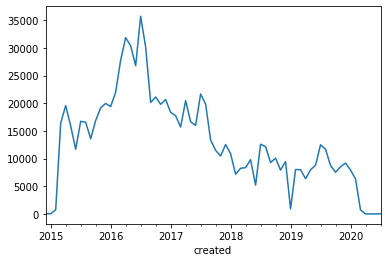

In [6]:
activity_by_month.plot()

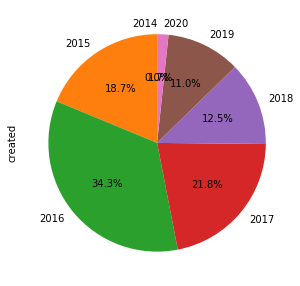

In [7]:
activity_by_year = pensActivity['created'].groupby(pensActivity.created.dt.to_period("Y")).agg('count')
activity_by_year.plot.pie(y='created', figsize=(5, 5),autopct='%1.1f%%', startangle=90)

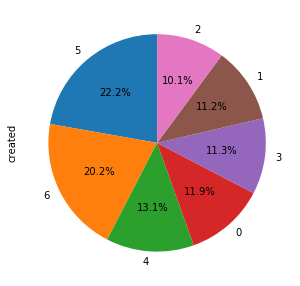

In [8]:
popular_days = pensActivity['created'].groupby(pensActivity.created.dt.weekday).agg('count').sort_values(ascending=False)
popular_days.plot.pie(y='created', figsize=(5, 5),autopct='%1.1f%%', startangle=90)

In [9]:
popular_days.nlargest()

created
5    198155
6    180288
4    116453
0    106043
3    100788
Name: created, dtype: int64

In [10]:
#zooming to Adam timeframe 
start_date = '01-01-2019'
end_date = '07-31-2019'
mask = (pensActivity['created'] > start_date) & (pensActivity['created'] <= end_date)
sevenMonths = pensActivity.loc[mask]
sevenMonths

,visit_id,pen_id,fingerprint,activity,notes,status_id,created,lastmodified,time_to_process,count_items
275984,126517331,1520347,4f3b1cd4cb190b8e2c636e292b99738788cc8135,"{""pen_uid"":""55db816f20002700"",""initial_time_st...",NaN,1,2019-01-01 03:00:06,2019-01-01 03:00:06,126,9
256494,126524581,1520747,499e12bbcb2e2ad78624d146e685e3b3a0281fc5,"{""pen_uid"":""585f836f01001600"",""initial_time_st...",NaN,1,2019-01-01 03:00:06,2019-01-01 03:00:06,203,4
148321,126525141,1522483,2a9a15fcebc4479f626078ef5aac3a8cf46b3a00,"{""pen_uid"":""595f836f0e000e00"",""initial_time_st...",NaN,1,2019-01-01 03:00:06,2019-01-01 03:00:06,80,1
678347,126525111,1524367,c2baae1b9f0c0f1bc0ae714918f0cc45bc309b15,"{""pen_uid"":""90ff826f01001300"",""initial_time_st...",NaN,1,2019-01-01 03:00:07,2019-01-01 03:00:09,1292,41
767242,126520961,1523411,dc435a2fdd5bea8fe9417ef3877108333a9b03a4,"{""pen_uid"":""595f836f20000100"",""initial_time_st...",NaN,1,2019-01-01 03:00:07,2019-01-01 03:00:07,328,8
...,...,...,...,...,...,...,...,...,...,...
85425,129003719,1522207,1882b81f30ee3cfc322f8c285f539b33250086d2,"{""pen_uid"":""595f836f03001300"",""initial_time_st...",NaN,1,2019-07-30 21:46:56,2019-07-30 21:46:57,565,15
317724,129003621,1522129,5b26c926d5cc77a3cc3f5d7db11dbe4f1879be67,"{""pen_uid"":""585f836f2d001c00"",""initial_time_st...",NaN,1,2019-07-30 21:48:04,2019-07-30 21:48:05,1204,40
111957,129005869,1525267,2015028f67014de87ba4fbbbf5fd03e3ebf9f384,"{""pen_uid"":""91ff826f0e002600"",""initial_time_st...",NaN,1,2019-07-30 21:50:29,2019-07-30 21:50:29,1036,32
281455,129005865,1524337,50cd8426614cb3fa964c8f6c56bd21dc15f917f8,"{""pen_uid"":""595f836f31001900"",""initial_time_st...",NaN,1,2019-07-30 21:50:49,2019-07-30 21:50:49,399,20


In [11]:
sevenMonths.count()
# in between adam timeframe 52,259 (what is it registration? activities?)

visit_id           52259
pen_id             52259
fingerprint        52259
activity           52259
notes                  0
status_id          52259
created            52259
lastmodified       52259
time_to_process    52259
count_items        52259
dtype: int64

## average time use

In [12]:
pensActivity[['created', 'lastmodified']]

,created,lastmodified
131729,2014-12-15 15:32:19,2014-12-15 15:32:19
628374,2014-12-15 15:52:19,2014-12-15 15:52:19
473963,2014-12-15 15:56:09,2014-12-15 15:56:09
771570,2014-12-15 15:56:30,2014-12-15 18:11:49
760275,2014-12-15 15:58:11,2014-12-15 18:10:29
...,...,...
494124,2020-07-02 20:22:39,2020-07-02 20:22:39
676664,2020-07-06 17:42:37,2020-07-06 17:42:37
283113,2020-07-09 13:12:38,2020-07-09 13:12:38
595596,2020-07-09 13:16:52,2020-07-09 13:16:52


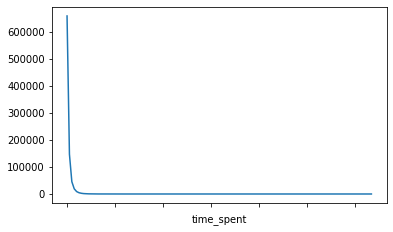

In [27]:
pensActivity['time_spent'] = pensActivity['lastmodified'] - pensActivity['created']
less_day = pensActivity['time_spent'] < '1day'
mask_day = pensActivity[less_day]
mask_day.groupby('time_spent').size().plot()

In [137]:
above_five = pensActivity['time_spent'] > '00:05:00'
range_time = pensActivity[less_day & above_five]
range_time

,visit_id,pen_id,fingerprint,activity,notes,status_id,created,lastmodified,time_to_process,count_items,time_spent
771570,1509665,1509677,dd7a1ecaf59145b51fb13110598a99be48cc88ff,"{""pen_uid"":""91ff826f08001b00"",""initial_time_st...",Insufficient permissions for object at index 1,0,2014-12-15 15:56:30,2014-12-15 18:11:49,0,6,02:15:19
760275,1509687,1509683,da4055c2974155441bc26679ea37d9d57421a4fc,"{""pen_uid"":""91ff826f22001600"",""initial_time_st...",Insufficient permissions for object at index 2,0,2014-12-15 15:58:11,2014-12-15 18:10:29,0,6,02:12:18
249259,1510757,1510711,478c528669c311186e9e7e8e88749b9d643cd657,"{""pen_uid"":""90ff826f19002b00"",""initial_time_st...",NaN,1,2014-12-18 18:34:08,2014-12-18 18:54:15,0,10,00:20:07
162136,1513941,1510727,2e8c2f6023bf8cee5dc66add87c8ae490466b0cb,"{""pen_uid"":""90ff826f13001000"",""initial_time_st...",NaN,1,2015-01-07 22:08:42,2015-01-08 14:58:41,0,10,16:49:59
446137,1513939,1510725,801476732d0487079f13d768fabeb129e066e033,"{""pen_uid"":""91ff826f06002100"",""initial_time_st...",NaN,1,2015-01-07 22:09:06,2015-01-08 14:58:24,0,11,16:49:18
738129,1513941,1526385,d3f4b4d8c781055c7878e5dbf5d6c696493783fd,"{""pen_uid"":""595f836f1d001b00"",""initial_time_st...",NaN,1,2015-02-04 00:37:42,2015-02-04 14:28:18,0,4,13:50:36
824417,1528353,1526385,ec93f0a1ba2eb24d24c440583cec25d2fd895df8,"{""pen_uid"":""595f836f1d001b00"",""initial_time_st...",NaN,1,2015-02-12 17:24:17,2015-02-13 17:07:41,0,1,23:43:24
117606,1528353,1526385,21b8111960c2781fefd08b7b770e95ddb1f566c7,"{""pen_uid"":""595f836f1d001b00"",""initial_time_st...",NaN,1,2015-02-12 17:24:18,2015-02-13 17:07:42,0,2,23:43:24
464811,1528447,1526691,857bbc53fc78c471080ba1d8dc625ba4113105a3,"{""pen_uid"":""585f836f18001000"",""initial_time_st...",NaN,1,2015-02-12 18:53:16,2015-02-12 19:24:35,0,17,00:31:19
144072,1513941,1510727,2960f7cfec0513386bed4c0a1a815d9395d17220,"{""pen_uid"":""90ff826f13001000"",""initial_time_st...",NaN,1,2015-03-03 23:26:42,2015-03-04 17:04:21,0,7,17:37:39


In [37]:
range_time.info() 
#only 42 entries that are less than a day and more than 5 min

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42 entries, 771570 to 58754
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype          
---  ------           --------------  -----          
 0   visit_id         42 non-null     int64          
 1   pen_id           42 non-null     int64          
 2   fingerprint      42 non-null     object         
 3   activity         42 non-null     object         
 4   notes            2 non-null      category       
 5   status_id        42 non-null     int64          
 6   created          42 non-null     datetime64[ns] 
 7   lastmodified     42 non-null     datetime64[ns] 
 8   time_to_process  42 non-null     int64          
 9   count_items      42 non-null     int64          
 10  time_spent       42 non-null     timedelta64[ns]
dtypes: category(1), datetime64[ns](2), int64(5), object(2), timedelta64[ns](1)
memory usage: 3.8+ KB


In [39]:
range_time.groupby('time_spent').size()

time_spent
00:05:16    1
00:05:24    1
00:05:54    1
00:07:44    1
00:09:17    1
00:09:23    1
00:10:58    1
00:11:08    1
00:12:09    1
00:13:23    1
00:14:49    1
00:15:34    1
00:16:33    1
00:18:22    1
00:20:07    1
00:26:07    1
00:27:56    1
00:28:10    1
00:31:19    1
00:31:31    1
00:31:40    1
00:31:51    1
00:34:12    1
00:34:14    1
00:45:05    1
00:45:46    1
00:49:22    1
00:55:09    1
00:57:12    1
00:58:20    1
01:35:04    1
02:12:18    1
02:15:19    1
04:19:34    1
07:35:03    1
08:30:17    1
13:50:36    1
16:49:18    1
16:49:59    1
17:37:39    1
23:43:24    2
dtype: int64

In [40]:
range_time['time_spent'].mean()

Timedelta('0 days 03:36:48.333333')

In [23]:
over_day = pensActivity['time_spent'] > '1day'
pensActivity[over_day]

,visit_id,pen_id,fingerprint,activity,notes,status_id,created,lastmodified,time_to_process,count_items,time_spent
279607,1509705,1509673,50461ab47cab2c8e2b04c87257c45c4dae4f872e,"{""pen_uid"":""90ff826f0a001d00"",""initial_time_st...",NaN,1,2014-12-15 21:07:40,2015-02-04 00:10:05,0,2,50 days 03:02:25
504639,1509661,987051,90dbcc0c0e2b7e41696c73170bdc17fd8a564e82,"{""pen_uid"":""90ff826f09001300"",""initial_time_st...",NaN,1,2014-12-15 21:42:02,2014-12-18 17:12:59,0,4,2 days 19:30:57
160430,1509705,1509673,2e0b5883e3d730324c318dd69915fddde1d77153,"{""pen_uid"":""90ff826f0a001d00"",""initial_time_st...",NaN,1,2014-12-15 21:42:19,2014-12-18 17:13:01,0,11,2 days 19:30:42
745239,1509687,1509683,d5f946b3127654124b99c9ce63ded3c7dce145e8,"{""pen_uid"":""91ff826f22001600"",""initial_time_st...",NaN,1,2014-12-15 21:44:36,2014-12-18 17:13:03,0,7,2 days 19:28:27
303857,1509379,1509677,57291be8fc50e58ccce51d2dc143b70ef2211bf1,"{""pen_uid"":""91ff826f08001b00"",""initial_time_st...",NaN,1,2014-12-15 21:45:17,2014-12-18 17:13:05,0,3,2 days 19:27:48
...,...,...,...,...,...,...,...,...,...,...,...
744349,1652507,1524993,d5b95f3214b4788f985cc5853a3649c767318b8b,"{""pen_uid"":""90ff826f1c000d00"",""initial_time_st...",NaN,1,2015-03-05 22:22:50,2015-03-09 00:47:57,536,87,3 days 02:25:07
146138,1652495,1522925,29fbb11344e87d9370938e092c46f5e233b235cf,"{""collection"":[{""record_data"":""chsdm:o:5168133...",NaN,1,2015-03-06 15:15:23,2015-03-09 01:50:22,1043,302,2 days 10:34:59
419049,1652511,1523211,783f576ead576538e99a6c5f90c69bdc96a1d27d,"{""collection"":[{""record_data"":""chsdm:o:5149762...",NaN,1,2015-03-06 21:01:46,2015-03-09 01:40:34,1087,186,2 days 04:38:48
670731,2147585,1519921,c08df73c2a250fdc715fe5011a6f95bc462b8bfd,"{""collection"":[{""record_id"":1,""record_data"":""c...",NaN,1,2015-03-07 04:13:45,2015-03-08 04:58:47,63,2,1 days 00:45:02


## the most used pens

In [44]:
pensActivity.groupby('pen_id').size().nlargest(10)

pen_id
1521687    1480
1525511    1288
1523121    1184
1521555    1107
1519959    1104
1523605    1093
1520277    1048
1521201    1020
1520023     987
1521525     969
dtype: int64

In [140]:
by_items = pensActivity[['pen_id', 'count_items']]
by_items.sort_values(by='count_items', ascending =False).head(10)

,pen_id,count_items
212891,1526757,1235
344757,1519901,1183
700658,1522701,1082
418459,1526757,1066
265091,1522701,943
417713,1520305,911
105805,1522193,872
382639,1523891,859
768639,1523523,851
642377,1522291,830


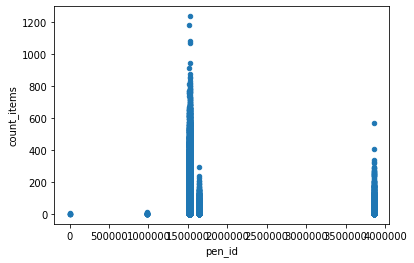

In [66]:
plt.rcParams['agg.path.chunksize'] = 40000
by_items.plot(x='pen_id', y='count_items', kind='scatter')

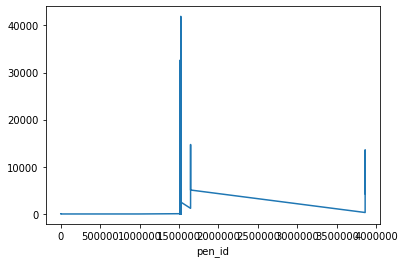

In [78]:
sum_per_pen = by_items.groupby(["pen_id"]).count_items.sum()
sum_per_pen.plot()

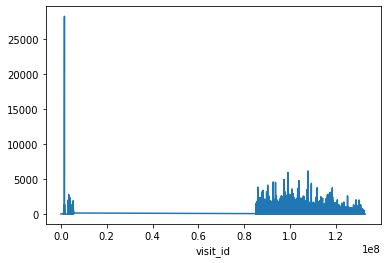

In [77]:
sum_per_visit = pensActivity.groupby(["visit_id"]).count_items.sum()
sum_per_visit.plot()

In [88]:
pensActivity[pensActivity['count_items'] < 500]
#more the 500 items per visit is fishy

,visit_id,pen_id,fingerprint,activity,notes,status_id,created,lastmodified,time_to_process,count_items,time_spent
131729,1509709,5,25d0ca6227e881c0f38c088d9f424737ec2773e1,"{""collection"":[{""record_id"":1,""record_data"":""c...",NaN,1,2014-12-15 15:32:19,2014-12-15 15:32:19,0,2,00:00:00
628374,1509661,1509681,b4737a3d142bb06f6d70dd02bd64f6a956792e59,"{""pen_uid"":""91ff826f0b001e00"",""initial_time_st...",Insufficient permissions for object at index 1,0,2014-12-15 15:52:19,2014-12-15 15:52:19,0,7,00:00:00
473963,1509705,1509673,8810c7196f7f12237868251ff4b34ffe1e2a6d99,"{""pen_uid"":""90ff826f0a001d00"",""initial_time_st...",Insufficient permissions for object at index 3,0,2014-12-15 15:56:09,2014-12-15 15:56:09,0,5,00:00:00
771570,1509665,1509677,dd7a1ecaf59145b51fb13110598a99be48cc88ff,"{""pen_uid"":""91ff826f08001b00"",""initial_time_st...",Insufficient permissions for object at index 1,0,2014-12-15 15:56:30,2014-12-15 18:11:49,0,6,02:15:19
760275,1509687,1509683,da4055c2974155441bc26679ea37d9d57421a4fc,"{""pen_uid"":""91ff826f22001600"",""initial_time_st...",Insufficient permissions for object at index 2,0,2014-12-15 15:58:11,2014-12-15 18:10:29,0,6,02:12:18
...,...,...,...,...,...,...,...,...,...,...,...
494124,132777683,1524473,8de20189e64f86c4f892b98ca7d30077b00b3874,"{""ticket_id"":""tzctj"",""registers"":""None"",""colle...",NaN,1,2020-07-02 20:22:39,2020-07-02 20:22:39,161,1,00:00:00
676664,132794701,1524473,c24003e782909cd4a8385fd84970943237aa605b,"{""ticket_id"":""gz65"",""registers"":""None"",""collec...",NaN,1,2020-07-06 17:42:37,2020-07-06 17:42:37,159,1,00:00:00
283113,132806719,1524473,513e424fc16895f97ae6e70e9bb74f9a58c59229,"{""ticket_id"":""56bs6"",""registers"":""None"",""colle...",NaN,1,2020-07-09 13:12:38,2020-07-09 13:12:38,172,1,00:00:00
595596,132806727,1524473,ab224c85d1194f9136c2903b41c6f56a34d7875b,"{""ticket_id"":""cvszd"",""registers"":""None"",""colle...",NaN,1,2020-07-09 13:16:52,2020-07-09 13:16:52,122,1,00:00:00


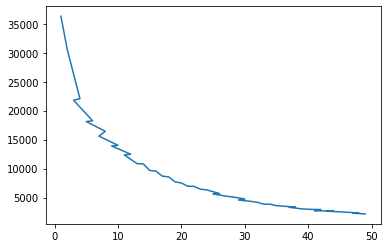

In [141]:
freq_count = pensActivity.groupby(["visit_id"]).count_items.sum()
freq_count = freq_count.to_frame()

less_fifthy_items = freq_count[freq_count['count_items'] < 50]
more_than_zero = less_fifthy_items[less_fifthy_items['count_items'] > 0]
more_than_zero['count_items'].value_counts().plot(x='counts_items', y='count_visits')
# sharp dropoff between 0-5, most visits collected 0 
# the range between 10-40 iis also pretty active

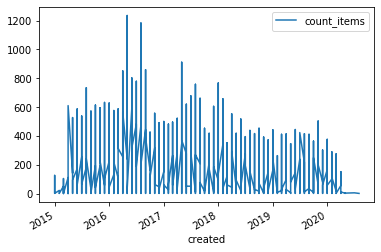

In [12]:
plt.rcParams['agg.path.chunksize'] = 40000

items_by_date = pensActivity[['count_items', 'created']]
freq_count_by_date = items_by_date.groupby(['count_items', pd.Grouper(key='created', freq='M')]).agg('count')
freq_count_by_date.reset_index().plot(x='created', y='count_items')